Coded, Noted and Created by Han 2024

# Bank Loan Granting Exploration & Prediction

### Data Exploration and Cleaning

dataset can be found at https://www.kaggle.com/datasets/atefehmirnaseri/bank-loan-granting

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [63]:
df=pd.read_csv('Bank_Loan_Granting.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [64]:
df.shape

(5000, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


There are 5000 rows and 14 columns in the dataset. The columns are as follows:
-  ID: Unique ID of the customer
-  Age: Age of the customer
-  Experience: Years of experience
-  Income: Annual income of the customer
-  ZIP Code: ZIP code of the customer
-  Family: Family size of the customer
-  CCAvg: Average spending on credit cards per month -> ```this column is still in object type, so it needs to be converted to float type later.```
- Education : the level of customer's Education(undergraduate,graduate,professional)
- Mortgage : the Value of the customer's mortgage (the thing that the customer uses as a guarantee to the bank/pinjaman yang pakai jaminan dan itu valuenya) 
- Securities Account : whether the customer has a security account or not(it's also known as an investment account)
- CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest - on a fixed amount of money for a fixed period) -> Deposito
- Online : the customer uses the bank's online services or not
- CreditCard : the customer uses the bank's credit card or not
- Personal Loan : the customer is granted loans or not -> ```this is the target variable```

#### Questions gathered from columns present in the dataset:
- What is the distribution of the target variable?
- What is the annual income distribution of the customers?
- Is credit card spending related to the annual income of the customers?
- What is the corelation between having a credit card and having a personal loan?
- Is having high mortgage value related to having a personal loan?
- Is having a CD account related to having a personal loan?
- Correlation between experience and income
- Correlation between education and income
- Overall correlation between all the columns to the target variable and which feature is most important

#### Checking for missing values and duplicates

In [66]:
df.isna().sum(), df.duplicated().sum()

(ID                    0
 Age                   0
 Experience            0
 Income                0
 ZIP Code              0
 Family                0
 CCAvg                 0
 Education             0
 Mortgage              0
 Personal Loan         0
 Securities Account    0
 CD Account            0
 Online                0
 CreditCard            0
 dtype: int64,
 0)

There is no duplicate data and no missing values in the dataset.

#### Target Variable Distribution

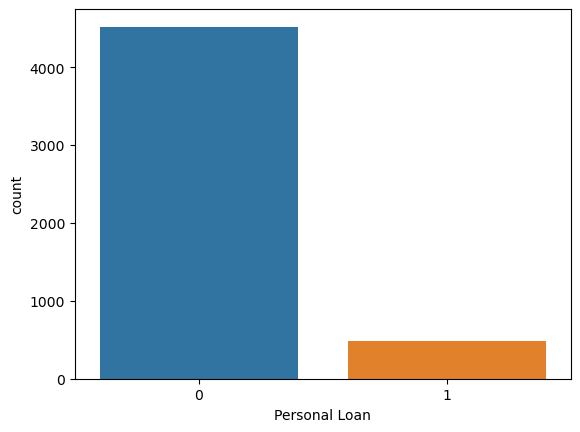

In [67]:
#Personal loan
sns.countplot(x='Personal Loan',data=df)
plt.show()

Majority of the customers are not granted loans. The dataset is imbalanced. This needs to be taken into consideration while building the model and may need to use SMOTE to balance the dataset.

#### Annual Income Distribution

<Axes: xlabel='Income'>

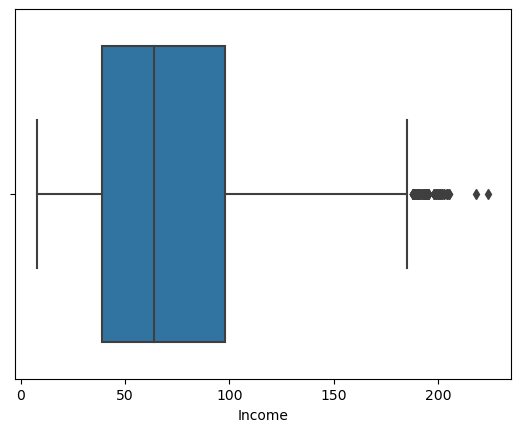

In [68]:
sns.boxplot(x='Income',data=df)

d:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


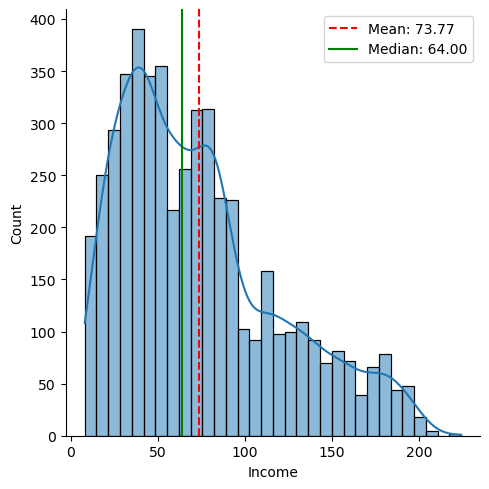

In [69]:
mean_income = df['Income'].mean()
median_income = df['Income'].median()

sns.displot(data=df, x='Income', kde=True)  #The kde line in sns.displot is a representation of the kernel density estimate, which provides a smoothed probability density curve for the data. It is often used to visualize the distribution of data alongside a histogram.
plt.axvline(mean_income, color='r', linestyle='--', label=f'Mean: {mean_income:.2f}') #axvline() function is used to add a vertical line across the axis. The vertical line will be added at the specified x-axis value.
plt.axvline(median_income, color='g', linestyle='-', label=f'Median: {median_income:.2f}')
plt.legend()
plt.show()

In [70]:
skewness = df['Income'].skew()
std_dev = df['Income'].std()
print(f'Skewness: {skewness}')
print(f'Standard Deviation: {std_dev}')

Skewness: 0.8413386072610816
Standard Deviation: 46.033729321086334


The majority of income is in lower side of the distribution which is between 50k to 100k.

Based on the distribution itself, the skewness is 0.84, which means the distribution is right-skewed and can be seen from the plot where the tail extends to right and mean is higher than median. This means that even the majority of the customers have lower income, there are still some customers with high income.

#### Credit Card Spending vs Annual Income

In [71]:
df['CCAvg'].dtype

dtype('O')

Convert the CCAvg column from object to float type.
Such as 1/2 to 0.5

In [72]:
df['CCAvg'] = df['CCAvg'].apply(lambda x: 
                                eval(x.split('/')[0]) /    # Numerator
                                eval(x.split('/')[1])      # Denominator
                                if 
                                    eval(x.split('/')[1]) != 0  # Check for zero division
                                else 
                                    0 # Return 0 if denominator is zero
                                )                    

In [73]:
df['CCAvg'].dtype , df['CCAvg'].head()

(dtype('float64'),
 0    0.016667
 1    0.020000
 2    0.000000
 3    0.028571
 4    0.000000
 Name: CCAvg, dtype: float64)

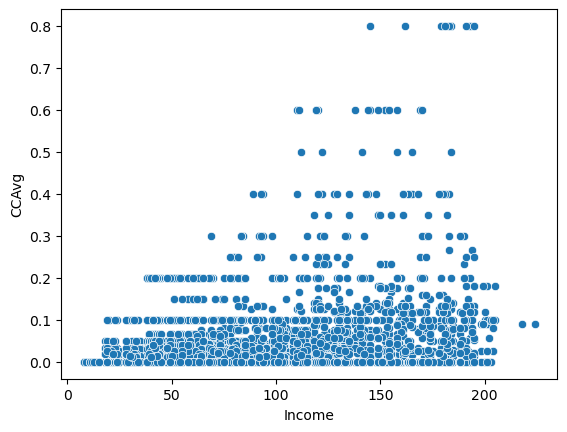

In [74]:
#Visualizing the correlation between CC Spending and Income
sns.scatterplot(x='Income', y='CCAvg', data=df)
plt.show()

In [75]:
#Pearson correlation coefficient
corr = df['Income'].corr(df['CCAvg'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: 0.38


From visualization and calculation there are weak to moderate relationship between the two variables. 

There are weak patterns that can be seen from the plot, but it is not strong enough to say that the two variables are highly correlated. There are increase in the credit card spending as the income increases, but there are also some customers with high income but low credit card spending.

#### Credit Card vs Personal Loan

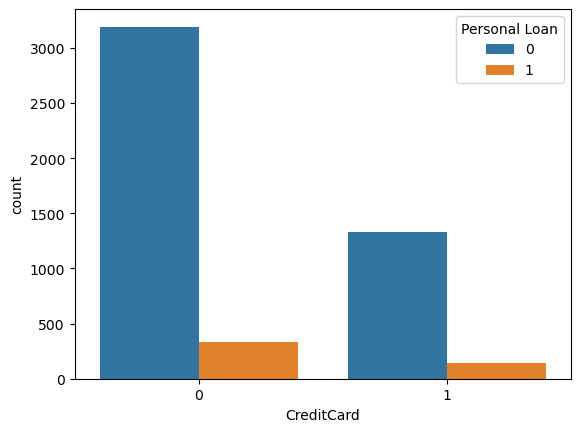

In [76]:
# Visualize corelation between credit card and personal loan
sns.countplot(x='CreditCard', hue='Personal Loan', data=df)
plt.show()

There are low correlation between having a credit card and having a personal loan. This means that having a credit card does not necessarily mean that the customer will be granted a loan.

#### High Mortgage Value will guarantee Personal Loan?

d:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


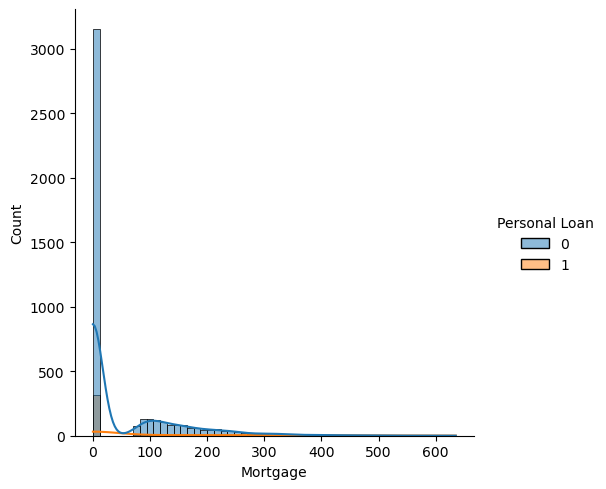

In [77]:
# Mortgage distribution
sns.displot(data=df, x='Mortgage',hue='Personal Loan', kde=True)
plt.show()

Majority of customer have no mortgage and still got granted.

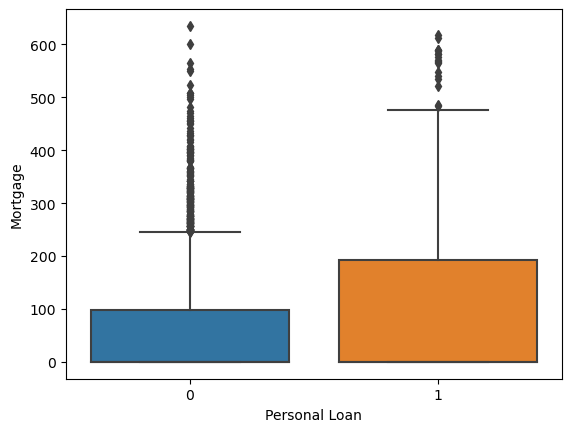

In [78]:
# Visualize the correlation between mortgage and personal loan status
sns.boxplot(x='Personal Loan', y='Mortgage', data=df)
plt.show()

There is a potential relationship between having a high mortgage value and the likelihood of getting a personal loan since the Q3 is higher for customers with personal loan compared to customers without personal loan.

In [79]:
df.groupby('Personal Loan')['Mortgage'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal Loan,,,,,,,,
0,4520.0,51.789381,92.038931,0.0,0.0,0.0,98.0,635.0
1,480.0,100.845833,160.847862,0.0,0.0,0.0,192.5,617.0


The mean of having a personal loan is higher for customers with high mortgage value compared to customers with low mortgage value. But the max value of both groups are the similar

Let's check the correlation

In [80]:
df['Mortgage'].corr(df['Personal Loan'])

0.14209523632788262

From the corelation, there is a weak correlation between having a mortgage and having a personal loan. This means that having a mortgage does not guarantee that the customer will be granted a loan but higher mortgage values might slightly correspond to personal loan but not strongly.

#### Corelation between experience and income

<Axes: xlabel='Experience', ylabel='Income'>

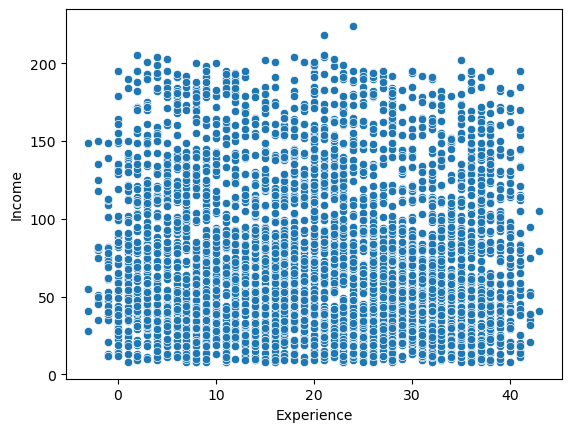

In [81]:
sns.scatterplot(x='Experience', y='Income', data=df)

In [82]:
df['Experience'].corr(df['Income'])

-0.04657417765298184

Near zero corelation so there is no corelation

#### Corelation between education and income

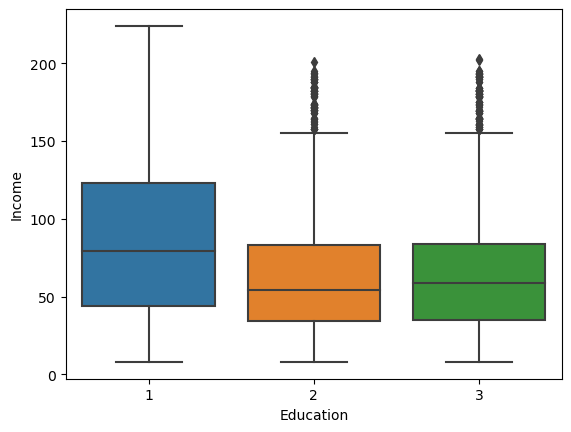

In [83]:
# Visualize the correlation between mortgage and personal loan status
sns.boxplot(x='Education', y='Income', data=df)
plt.show()

In [84]:
df['Education'].corr(df['Income'])

-0.18752425737223882

Surprisingly there is low negative corelation between education and income. This means that the higher the education level, the lower the income. This is interesting.

#### Overall corelation between all the columns to the target variable

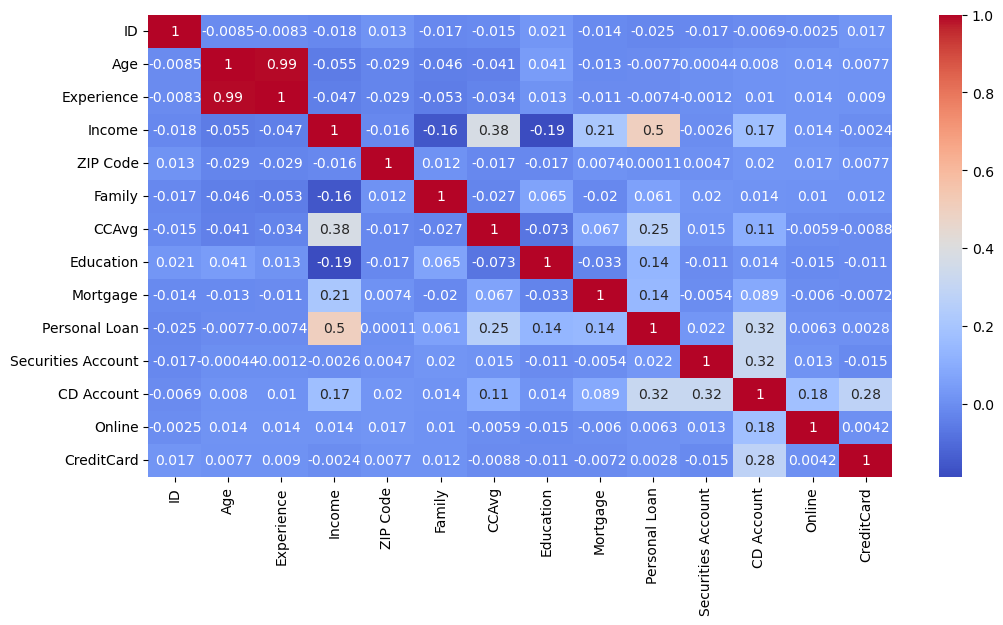

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

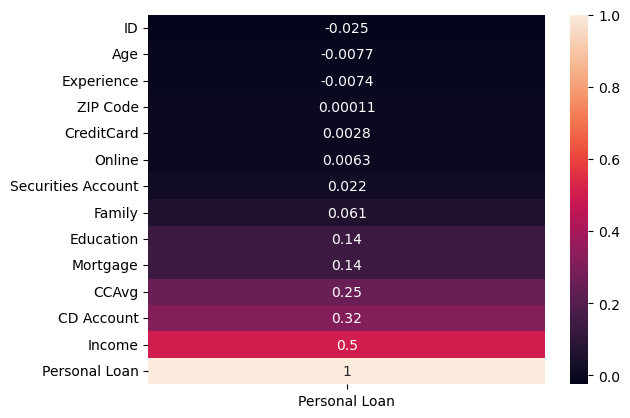

In [86]:
sns.heatmap(df.corr()[['Personal Loan']].sort_values(by='Personal Loan'), annot=True)

From corelation, the highest correlation is with income, followed by CD account and CCAvg. This means that these three variables are the most important features in predicting whether the customer will be granted a loan or not.

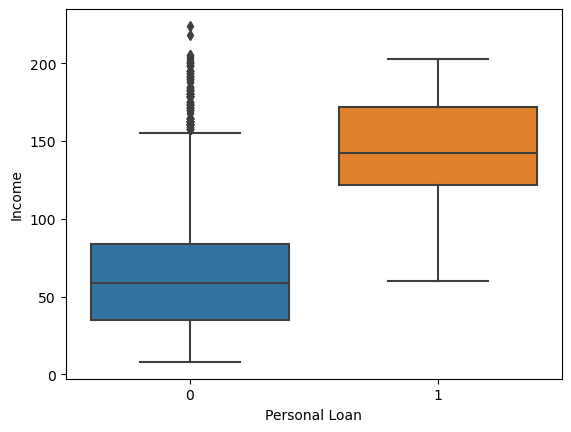

In [87]:
#visualizing the income vs personal loan
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.show()

from this basic visualization, higher income outcomes the higher chance of getting a loan.

### Feature Selection, Engineering, Scaling & Data Balancing

#### Feature Selection

Based on the correlation, the most important features are income, CD account, CCAvg, Mortgage, and Education. These features will be used to build the model.

In [88]:
X=df[['Income','CCAvg','Education','Mortgage']]
y=df['Personal Loan']

In [89]:
y.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Checking the multicolinearity between the features.

<Axes: >

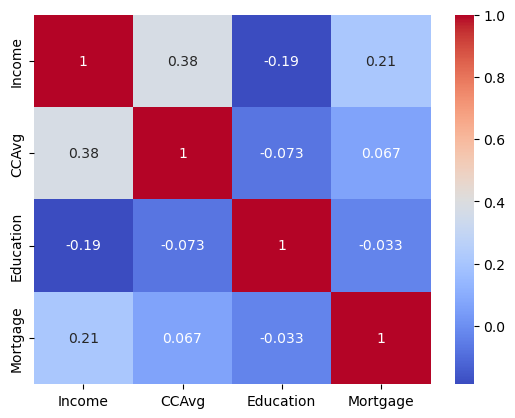

In [90]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

There is no multicolinearity(>0.7 or <-0.7) between the features. 

In [91]:
X.describe()

,Income,CCAvg,Education,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,73.774200,0.038089,1.881000,56.498800
std,46.033729,0.075835,0.839869,101.713802
min,8.000000,0.000000,1.000000,0.000000
25%,39.000000,0.000000,1.000000,0.000000
50%,64.000000,0.012500,2.000000,0.000000
75%,98.000000,0.040000,3.000000,101.000000
max,224.000000,0.800000,3.000000,635.000000


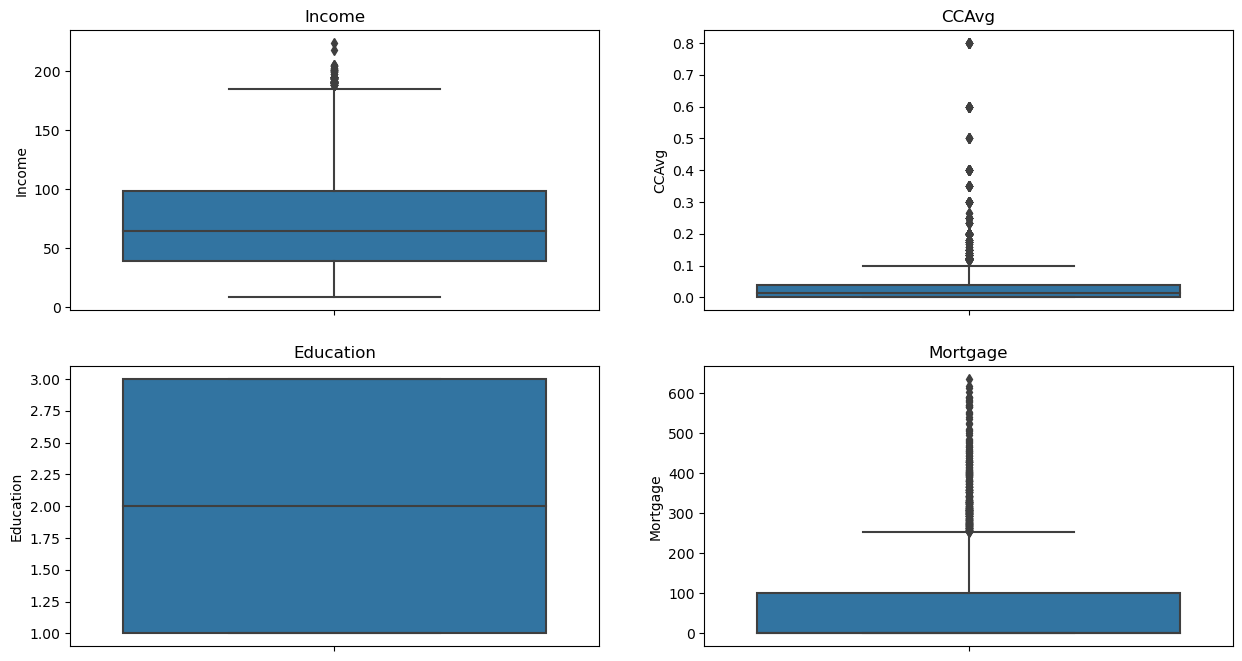

In [92]:
#Box plot for all X columns
plt.figure(figsize=(15,8))
for i,col in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.show()

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'CCAvg'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Mortgage'}>]], dtype=object)

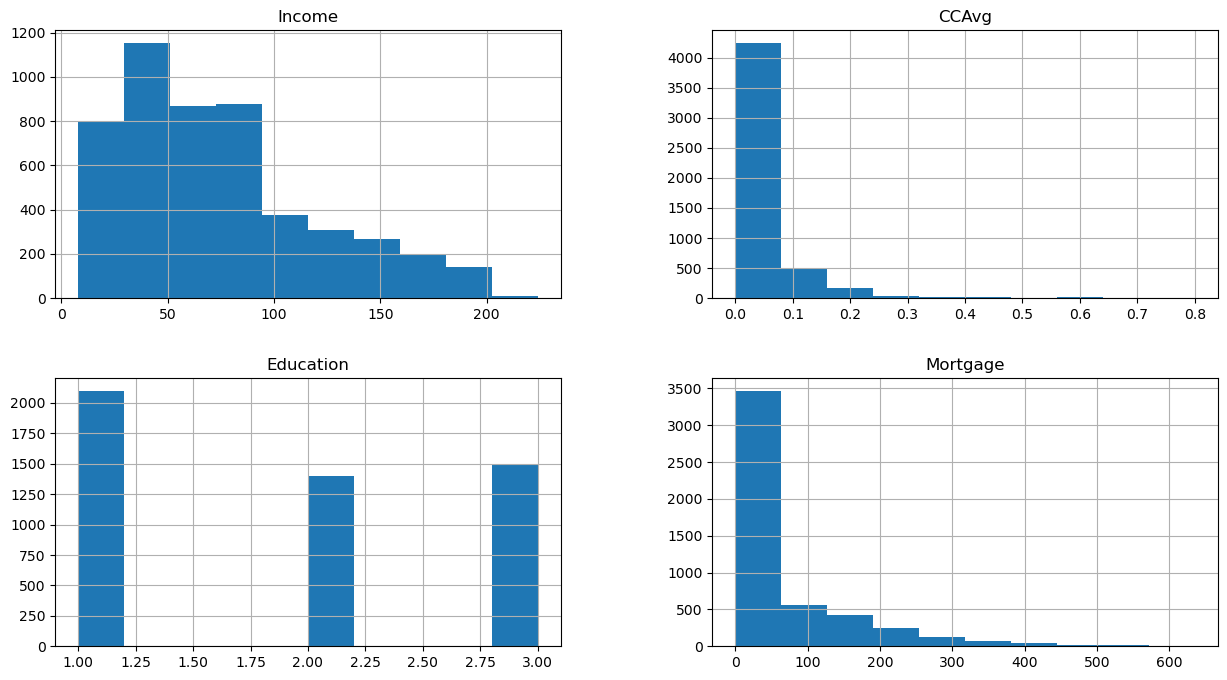

In [93]:
X.hist(figsize=(15,8))

In [94]:
#Print skewness of all columns X
for col in X.columns:
    print(f'{col}: {X[col].skew()}')

Income: 0.8413386072610816
CCAvg: 4.730520598219059
Education: 0.22709331566088503
Mortgage: 2.1040023191079444


As seen in the histogram and boxplot, the numerical data such as Income, CCAvg, and Mortgage got outliers and skewed. So, it needs to be scaled and transformed.

#### Transforming data and scaling

Logistic regression is sensitive to the scale of the data, so it is important to scale the data before building the model. Also, transforming the data will help to reduce the skewness and make the data more normally distributed.

Log transformation is applied to the numerical data to reduce the skewness and outliers and it is suited for right-skewed data.

np.log1p -> x'=log(1+x)

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, FunctionTransformer

In [96]:
preprocessor=Pipeline(
    [
        ('log_transform', FunctionTransformer(np.log1p, feature_names_out='one-to-one')), #log transform
        ('scaler',RobustScaler())
    ]
)  

In [97]:
X_processed = preprocessor.fit_transform(X[['Income', 'CCAvg', 'Mortgage']])
joblib.dump(preprocessor, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'CCAvg'}>],
       [<Axes: title={'center': 'Mortgage'}>, <Axes: >]], dtype=object)

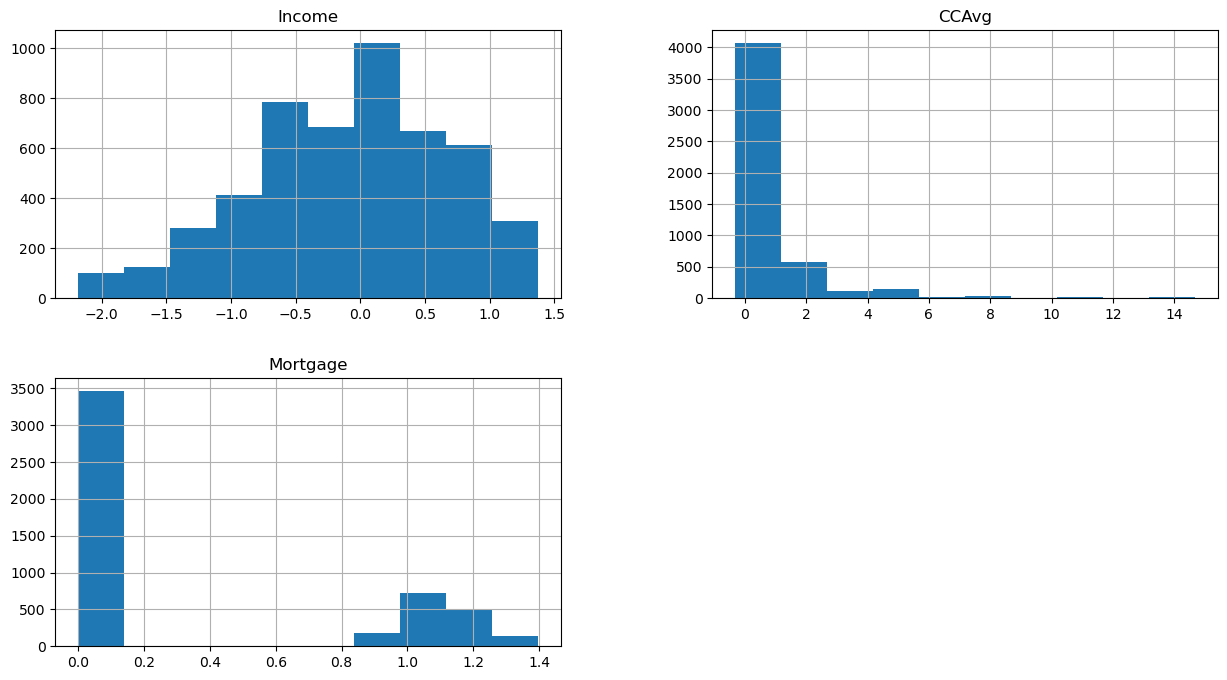

In [98]:
X_processed = pd.DataFrame(X_processed, columns=['Income', 'CCAvg', 'Mortgage'])
X_processed.hist(figsize=(15,8))

Income is now scaled better since the skewness is considered moderate before

In [99]:
#Check skewness of all columns X_processed
for col in X_processed.columns:
    print(f'{col}: {X_processed[col].skew()}')

Income: -0.4207118930549068
CCAvg: 3.8167733813448823
Mortgage: 0.8766882783607721


In [100]:
X_processed['Education'] = X['Education']

#### Data balancing using SMOTE (Synthetic Minority Over-sampling Technique)


In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
smote= SMOTE() # 0.5 means that the number of samples in the minority class will be half of the majority class
X_smote_processed, y_smote_processed = smote.fit_resample(X_processed,y)

In [103]:
X_smote, y_smote =smote.fit_resample(X,y)

#### Feature Engineering

Not adding more attribute to avoid multi-colinearity, since logistic regression is sensitive to multi-colinearity.

### Train Test Split & Model Building with Hyperparameter Tuning

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_smote_processed, y_smote_processed, test_size=0.2, random_state=42,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42,shuffle=True)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Algorithm to use
    'max_iter': [100, 500, 1000],  # Maximum iterations
    'class_weight': [None, 'balanced']  # Class weight handling
}

##### Logistic Regression Model with processed data

In [108]:
log_reg_processed=LogisticRegression()
grid_search_processed=GridSearchCV(log_reg_processed,param_grid,cv=5, scoring='accuracy')

grid_search_processed.fit(X_train_processed, y_train_processed)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search_processed.best_params_}')
print(f'Best Score: {grid_search_processed.best_score_}')

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8920091265278188


In [109]:
best_model_processed_log_reg = grid_search_processed.best_estimator_

##### Logistic Regression Model with unprocessed data

In [110]:
log_reg=LogisticRegression()
grid_search_log_reg=GridSearchCV(log_reg,param_grid,cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search_log_reg.best_params_}')
print(f'Best Score: {grid_search_log_reg.best_score_}')

d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Conda\Lib\site-packages\s

Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8734809750893966


d:\Conda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [111]:
best_model_log_reg = grid_search_log_reg.best_estimator_

##### Random Forest Model with random search

In [112]:
# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [113]:
rf=RandomForestClassifier()
grid_search_rf=RandomizedSearchCV(rf,rf_param_grid,cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Best Score: {grid_search_rf.best_score_}')

best_model_rf = grid_search_rf.best_estimator_

d:\Conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifier

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Best Score: 0.9459355503493182


##### XGBoost Model

In [114]:
from xgboost import XGBClassifier

In [115]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [116]:
xgb=XGBClassifier()
grid_search_xgb=RandomizedSearchCV(xgb,xgb_param_grid,cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search_xgb.best_params_}')
print(f'Best Score: {grid_search_xgb.best_score_}')

best_model_xgb = grid_search_xgb.best_estimator_

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best Score: 0.9516044546784925


### Model Evaluation

since this is classification problem, the evaluation metrics used are accuracy, precision, recall, and f1-score.

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Accuracy: 0.8932522123893806
Confusion Matrix: 
[[768 165]
 [ 28 847]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       933
           1       0.84      0.97      0.90       875

    accuracy                           0.89      1808
   macro avg       0.90      0.90      0.89      1808
weighted avg       0.90      0.89      0.89      1808



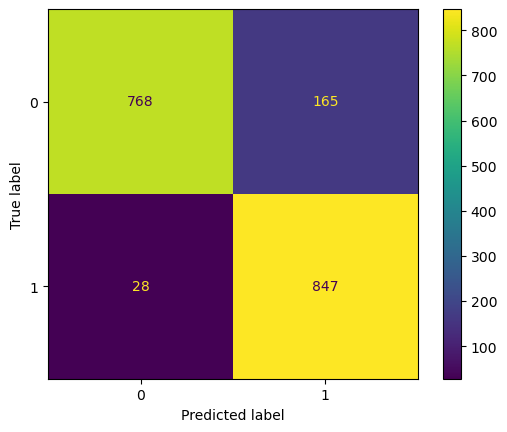

In [124]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    return acc

acc_processed=evaluate_model(best_model_processed_log_reg, X_test_processed, y_test_processed)

Accuracy: 0.8772123893805309
Confusion Matrix: 
[[772 161]
 [ 61 814]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       933
           1       0.83      0.93      0.88       875

    accuracy                           0.88      1808
   macro avg       0.88      0.88      0.88      1808
weighted avg       0.88      0.88      0.88      1808



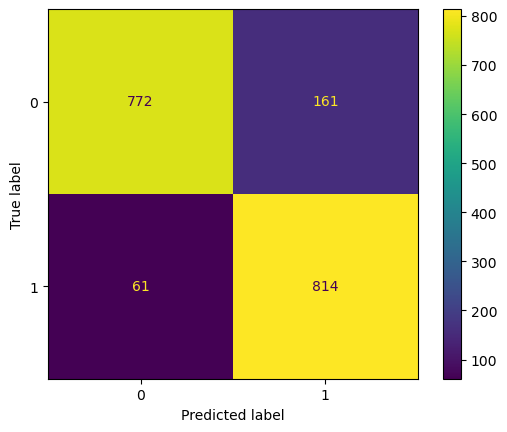

Accuracy: 0.9496681415929203
Confusion Matrix: 
[[882  51]
 [ 40 835]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       933
           1       0.94      0.95      0.95       875

    accuracy                           0.95      1808
   macro avg       0.95      0.95      0.95      1808
weighted avg       0.95      0.95      0.95      1808



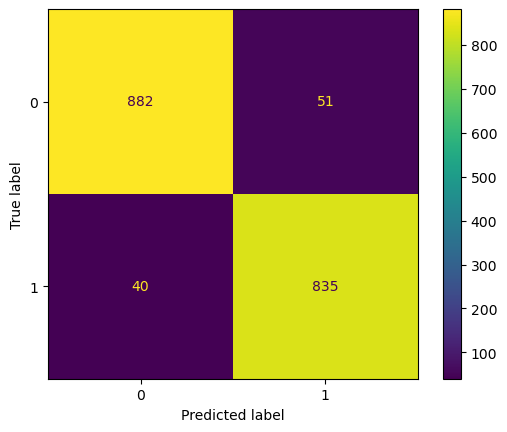

Accuracy: 0.952433628318584
Confusion Matrix: 
[[887  46]
 [ 40 835]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       933
           1       0.95      0.95      0.95       875

    accuracy                           0.95      1808
   macro avg       0.95      0.95      0.95      1808
weighted avg       0.95      0.95      0.95      1808



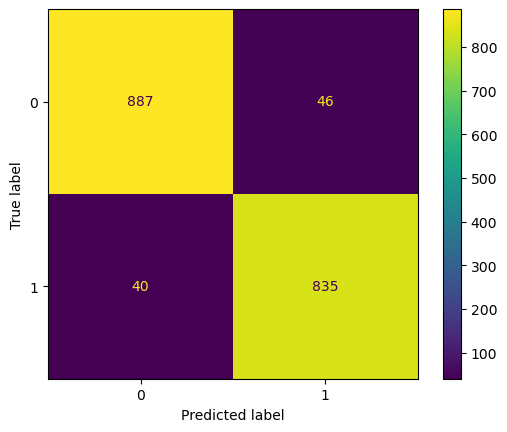

In [125]:
model_list = [best_model_log_reg, best_model_rf, best_model_xgb]
acc_list=[]
for model in model_list:
    acc=evaluate_model(model, X_test, y_test)
    acc_list.append(acc)
    plt.show()

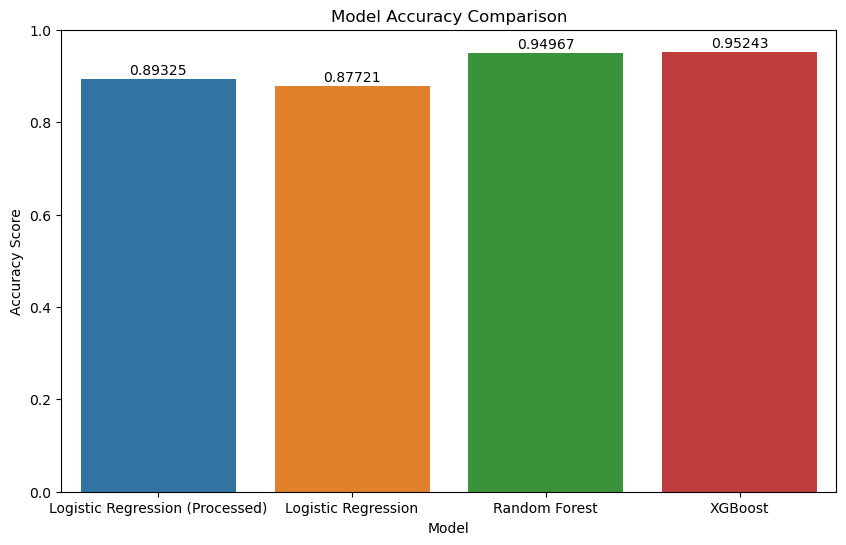

In [129]:
# Model names and their corresponding accuracy scores
model_names = ['Logistic Regression (Processed)', 'Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [acc_processed] + acc_list

# Create a DataFrame for visualization
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

# Add annotations
for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.5f}", color='black', ha="center")

plt.show()

The result shows that logistic regression with log transform and scaled features is performing better than the regular data without log transform and scaling which reflects the sensivity of the scale and distribution in the data.

Also, Random Forest and XGBoost is performing well in this data.

Random Forest
- Ensemble Method: Random Forest is an ensemble of decision trees, which means it combines the predictions of multiple trees to improve accuracy and reduce overfitting.
- Feature Importance: It can handle a large number of features and provides insights into feature importance, which is useful for understanding which factors are most influential in loan granting.
- Robustness: It is robust to outliers and noise in the data, which is common in real-world datasets.
- Non-linear Relationships: Random Forest can capture non-linear relationships between features, which are often present in financial data.

XGBoost
- Gradient Boosting: XGBoost is based on gradient boosting, which builds trees sequentially, each new tree correcting errors made by the previous ones. This often leads to better performance.
- Regularization: It includes regularization parameters to prevent overfitting, making it more generalizable to new data.
- Handling Missing Values: XGBoost has built-in mechanisms to handle missing values, which can be common in financial datasets.
- Speed and Efficiency: It is optimized for speed and performance, making it suitable for large datasets.

### Summary of Feature importance

Random Forest Feature Importance:
     Feature  Importance
0     Income    0.616583
1      CCAvg    0.247654
2  Education    0.077163
3   Mortgage    0.058600


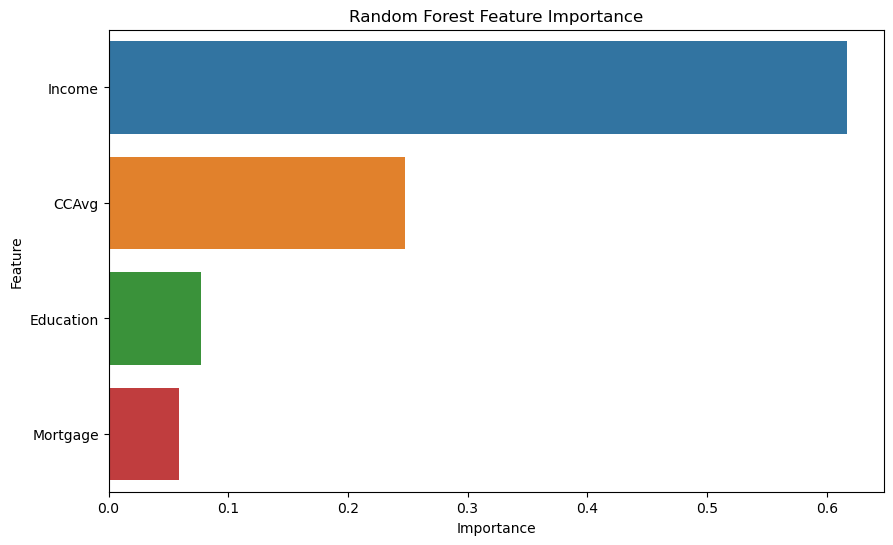

In [121]:
# Feature importance from Random Forest
rf_importances = best_model_rf.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:")
print(rf_feature_importance)

# Plotting Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

XGBoost Feature Importance:
     Feature  Importance
0     Income    0.495853
2  Education    0.333703
1      CCAvg    0.119701
3   Mortgage    0.050743


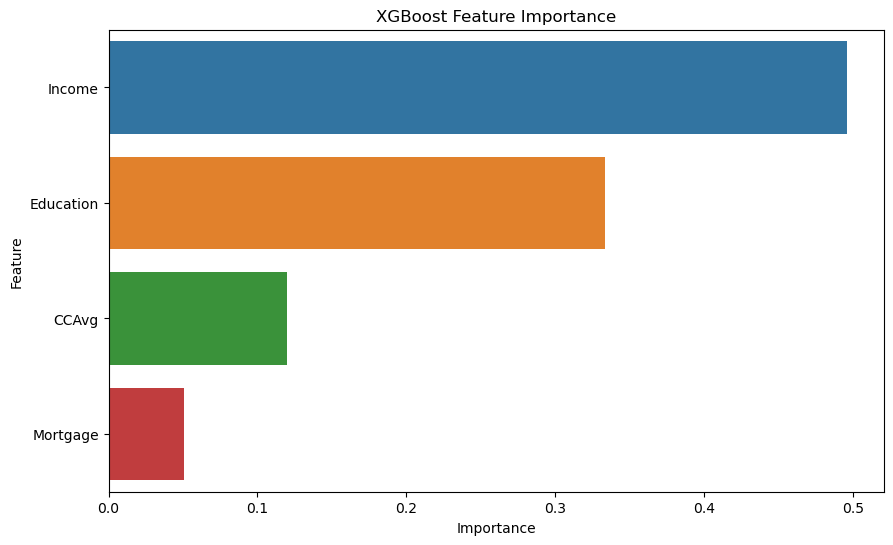

In [122]:

# Feature importance from XGBoost
xgb_importances = best_model_xgb.feature_importances_
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances})
xgb_feature_importance = xgb_feature_importance.sort_values(by='Importance', ascending=False)
print("XGBoost Feature Importance:")
print(xgb_feature_importance)

# Plotting XGBoost feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance)
plt.title('XGBoost Feature Importance')
plt.show()

In [132]:
from sklearn.feature_selection import RFE

# Initialize the model
model = RandomForestClassifier(max_depth=20, max_features='auto', n_estimators=200)

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
features=df.drop('Personal Loan', axis=1)
label=df[['Personal Loan']]
rfe.fit(features, label)

# Get the ranking of the features
ranking = rfe.ranking_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_importance = feature_importance.sort_values(by='Ranking', ascending=True)

print("Feature Importance using RFE:")
print(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_importance)
plt.title('Feature Importance using RFE')
plt.show()

d:\Conda\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
d:\Conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Conda\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
d:\Conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1

ValueError: All arrays must be of the same length